<a href="https://colab.research.google.com/github/nickwan/food_choices/blob/master/food_choices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food choices by pepegas 


In [1]:
from tqdm.notebook import tqdm
import warnings
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from scipy.stats import pearsonr, spearmanr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
project_dir = '/content/drive/My Drive/food_choices'
os.listdir(f"{project_dir}/data")

['codebook_food.docx', 'food_coded.csv']

In [19]:
df = pd.read_csv(f"{project_dir}/data/food_coded.csv")
df['life_rewarding'] = df['life_rewarding'].sub(11).abs()
df.shape

(125, 61)

# Does guessing calories wrongly influence your nihilism 

In [20]:
cal_cols = [x for x in df.columns.values if ((x.startswith('calories_')) or (x.endswith('_calories'))) and (x!='calories_day')]
target = 'life_rewarding'

In [21]:
df.loc[:,cal_cols + [target]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   calories_chicken   125 non-null    int64  
 1   calories_scone     124 non-null    float64
 2   tortilla_calories  124 non-null    float64
 3   turkey_calories    125 non-null    int64  
 4   waffle_calories    125 non-null    int64  
 5   life_rewarding     124 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 6.0 KB


In [22]:
df.loc[:,cal_cols + [target]].corr()

,calories_chicken,calories_scone,tortilla_calories,turkey_calories,waffle_calories,life_rewarding
calories_chicken,1.000000,0.062835,0.381808,0.397642,0.347542,0.276422
calories_scone,0.062835,1.000000,0.233255,-0.016898,0.364592,-0.079967
tortilla_calories,0.381808,0.233255,1.000000,0.475053,0.422238,0.232886
turkey_calories,0.397642,-0.016898,0.475053,1.000000,0.361239,0.116069
waffle_calories,0.347542,0.364592,0.422238,0.361239,1.000000,0.173308
life_rewarding,0.276422,-0.079967,0.232886,0.116069,0.173308,1.000000


In [25]:
model_data = df.loc[:,cal_cols + [target]]
model_data = model_data.dropna()
model_data.shape

(123, 6)

In [26]:
df_pred = pd.DataFrame()
kf = KFold(15, shuffle=True)
for train_idx, test_idx in kf.split(model_data):
  train_data = model_data.iloc[train_idx]
  test_data = model_data.iloc[test_idx]
  
  model = LinearRegression()
  model.fit(train_data.loc[:,cal_cols], train_data.loc[:,target])
  test_data[f'{target}_pred'] = pd.Series(model.predict(test_data.loc[:,cal_cols]), index=test_data.index)
  df_pred = df_pred.append(test_data)
df_pred.shape  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

(123, 7)

In [29]:
rmse = mean_squared_error(df_pred[target], df_pred[f"{target}_pred"])**0.5
r2 = pearsonr(df_pred[target], df_pred[f"{target}_pred"])[0]**2

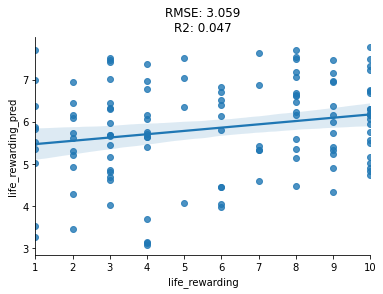

In [32]:
sns.regplot(target,f"{target}_pred",data=df_pred)
plt.title(f"""RMSE: {round(rmse,3)}\nR2: {round(r2,3)}""")
sns.despine()
plt.show()